In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

In [2]:
df=pd.read_excel("DS1_C4_S9_Car_Data.xlsx")
df

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


In [3]:
# Task 1

# Display the first few rows to inspect the relevant columns
df.head()

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Select and clean up relevant safety features columns
safety_features=df[['Make', 'Model', 'ABS_(Anti-lock_Braking_System)', 'Airbags', 'Hill_Assist']]

# Standardize the values for consistency
safety_features_cleaned=safety_features.fillna('No').replace({'Yes': 'Yes', 'No': 'No'})

# Group by Make and Model, and count how many models have each feature
grouped_safety=safety_features_cleaned.groupby(['Make', 'Model']).agg({
    'ABS_(Anti-lock_Braking_System)': lambda x: (x== 'Yes').sum(),
    'Airbags': lambda x: (x== 'Yes').sum(),
    'Hill_Assist': lambda x: (x== 'Yes').sum()
}).reset_index()

# Rename columns for clarity
grouped_safety.columns=['Make', 'Model', 'ABS_Count', 'Airbags_Count', 'Hill_Assist_Count']

grouped_safety.head(10)

,Make,Model,ABS_Count,Airbags_Count,Hill_Assist_Count
0,Aston Martin,Db 11,1,0,1
1,Aston Martin,Rapide,1,0,1
2,Aston Martin,Vantage,0,0,0
3,Audi,A3,4,0,4
4,Audi,A3 Cabriolet,1,0,1
5,Audi,A4,2,0,2
6,Audi,A5,1,0,0
7,Audi,A5 Cabriolet,1,0,0
8,Audi,A6,2,0,2
9,Audi,A8 L,1,0,1


In [5]:
# Insights:
# ABS- Present in most high-end models like Audi A3, A4, A6, and some Aston Martin variants.
# Airbags- Surprisingly, very few entries have recorded the presence of airbags(values are mostly missing or 'No').
# Hill Assist- Common in premium variants(especially Audi), but absent in more basic or older models.

In [6]:
# Task 2

# Select relevant columns
comfort_features=df[['Make', 'Model', 'Seating_Capacity', 'Central_Locking', 'Child_Safety_Locks']]

# Clean missing values: replace NaN with 'No' for categorical, keep NaN for numerical to calculate mean correctly
comfort_features['Central_Locking']=comfort_features['Central_Locking'].fillna('No')
comfort_features['Child_Safety_Locks']=comfort_features['Child_Safety_Locks'].fillna('No')

# Group by Make and Model to calculate average seating capacity
avg_seating=comfort_features.groupby(['Make', 'Model'])['Seating_Capacity'].mean().reset_index()

# Group by Make and Model to count occurences of 'Yes' for Central Locking and Child Safety Locks
lock_counts=comfort_features.groupby(['Make', 'Model'])[['Central_Locking', 'Child_Safety_Locks']].apply(
    lambda x: pd.Series({
        'Central_Locking_Count': (x['Central_Locking']== 'Yes').sum(),
        'Child_Safety_Locks_Count': (x['Child_Safety_Locks']== 'Yes').sum()
    })
).reset_index()

# Merge both dataframes for final result
comfort_summary=pd.merge(avg_seating, lock_counts, on=['Make', 'Model'])

comfort_summary.head(10)

C:\Users\Msi\AppData\Local\Temp\ipykernel_14344\495297081.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comfort_features['Central_Locking']=comfort_features['Central_Locking'].fillna('No')
C:\Users\Msi\AppData\Local\Temp\ipykernel_14344\495297081.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comfort_features['Child_Safety_Locks']=comfort_features['Child_Safety_Locks'].fillna('No')


,Make,Model,Seating_Capacity,Central_Locking_Count,Child_Safety_Locks_Count
0,Aston Martin,Db 11,2.0,1,1
1,Aston Martin,Rapide,4.0,1,1
2,Aston Martin,Vantage,2.0,0,0
3,Audi,A3,5.0,4,4
4,Audi,A3 Cabriolet,4.0,1,1
5,Audi,A4,5.0,2,2
6,Audi,A5,5.0,1,1
7,Audi,A5 Cabriolet,4.0,1,1
8,Audi,A6,5.0,2,2
9,Audi,A8 L,4.0,1,1


In [7]:
# Key Insights:
# 1. Seating Capacity: Most family-friendly models like the Audi A3, A4, A6 offer 5 seats on average, suitable for families.
# 2. Central Locking: Standard across most Audi models; fewer Aston Martin models include it.
# 3. Child Safety Locks: Consistently found in Audi models, including a family-focused design; rare in performance cars like the Vantage.

In [8]:
# Task 3

# Select relevant alert system columns
alert_features=df[['Make', 'Model', 'High_Speed_Alert_System', 'Fasten_Seat_Belt_Warning', 'Door_Ajar_Warning']]

# Standardize missing and Yes/No values
alert_features=alert_features.fillna('No').replace({'Yes': True, 'No': False})

# Group by Make and Model and count the presence of each alert
alert_summary=alert_features.groupby(['Make', 'Model']).agg({
    'High_Speed_Alert_System': 'sum',
    'Fasten_Seat_Belt_Warning': 'sum',
    'Door_Ajar_Warning': 'sum'
}).reset_index()

# Rename columns for clarity
alert_summary.columns=[
    'Make',
    'Model',
    'High Speed Alert Count',
    'Seat Belt Reminder Count',
    'Door Ajar Warning Count'
]

# Print the first few rows
print(alert_summary.head(10))

    Make                              Model  High Speed Alert Count  \
0  False                                Go+                       0   
1  False              Mercedes-Benz A-Class                       0   
2  False  Mercedes-Benz Amg Gt 4-Door Coupe                       0   
3  False               Mercedes-Benz Amg-Gt                       0   
4  False              Mercedes-Benz B-Class                       0   
5  False              Mercedes-Benz C-Class                       3   
6  False    Mercedes-Benz C-Class Cabriolet                       0   
7  False            Mercedes-Benz Cla-Class                       0   
8  False                  Mercedes-Benz Cls                       0   
9  False              Mercedes-Benz E-Class                       0   

   Seat Belt Reminder Count  Door Ajar Warning Count  
0                         9                        4  
1                         2                        2  
2                         0                        0 

C:\Users\Msi\AppData\Local\Temp\ipykernel_14344\4124055394.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  alert_features=alert_features.fillna('No').replace({'Yes': True, 'No': False})


In [10]:
# Task 3

# Prepare alert columns
alerts=df[['Make', 'Model', 'High_Speed_Alert_System',
           'Fasten_Seat_Belt_Warning', 'Door_Ajar_Warning']].copy()
alerts.fillna('No', inplace=True)

# Group by Make and Model counts
summary_df=alerts.groupby(['Make', 'Model']).agg({
    'High_Speed_Alert_System': lambda x: (x=='Yes').sum(),
    'Fasten_Seat_Belt_Warning': lambda x: (x=='Yes').sum(),
    'Door_Ajar_Warning': lambda x: (x=='Yes').sum()
}).reset_index()

# Rename columns for clarity
summary_df=summary_df.rename(columns={
    'High_Speed_Alert_System': 'High_Speed_Alert_Count',
    'Fasten_Seat_Belt_Warning': 'Seat_Belt_Warning_Count',
    'Door_Ajar_Warning': 'Door_Ajar_Warning_Count'
})

# Display first 10 rows
print(summary_df.head(10))

           Make         Model  High_Speed_Alert_Count  \
0  Aston Martin         Db 11                       0   
1  Aston Martin        Rapide                       0   
2  Aston Martin       Vantage                       0   
3          Audi            A3                       0   
4          Audi  A3 Cabriolet                       0   
5          Audi            A4                       2   
6          Audi            A5                       0   
7          Audi  A5 Cabriolet                       0   
8          Audi            A6                       2   
9          Audi          A8 L                       1   

   Seat_Belt_Warning_Count  Door_Ajar_Warning_Count  
0                        1                        1  
1                        1                        1  
2                        1                        1  
3                        4                        4  
4                        1                        1  
5                        2                      

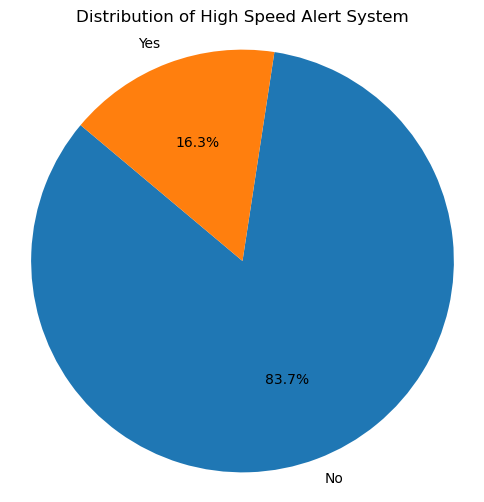

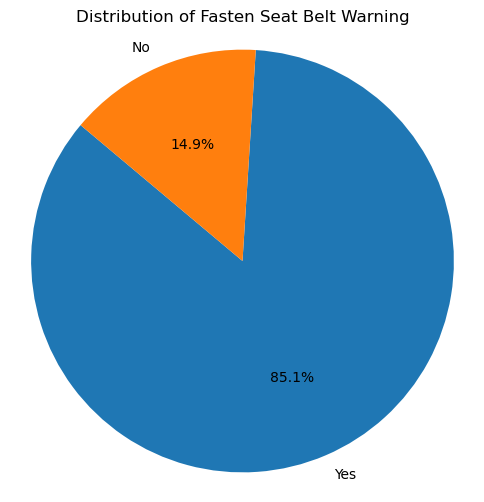

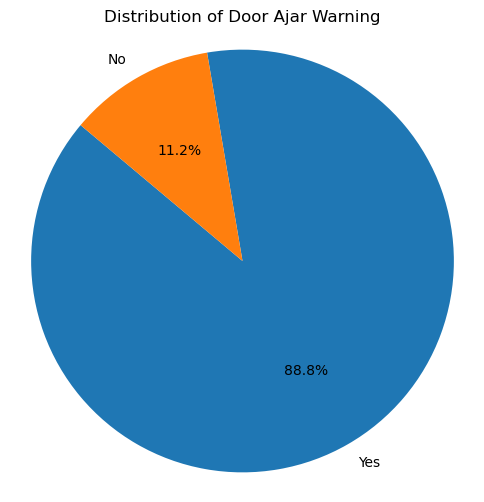

In [11]:
# Plot pie charts for overall distribution of each alert feature
features=['High_Speed_Alert_System', 'Fasten_Seat_Belt_Warning', 'Door_Ajar_Warning']

for feature in features:
    counts=alerts[feature].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.axis('equal') # Ensures the pie chart is circular
plt.show()

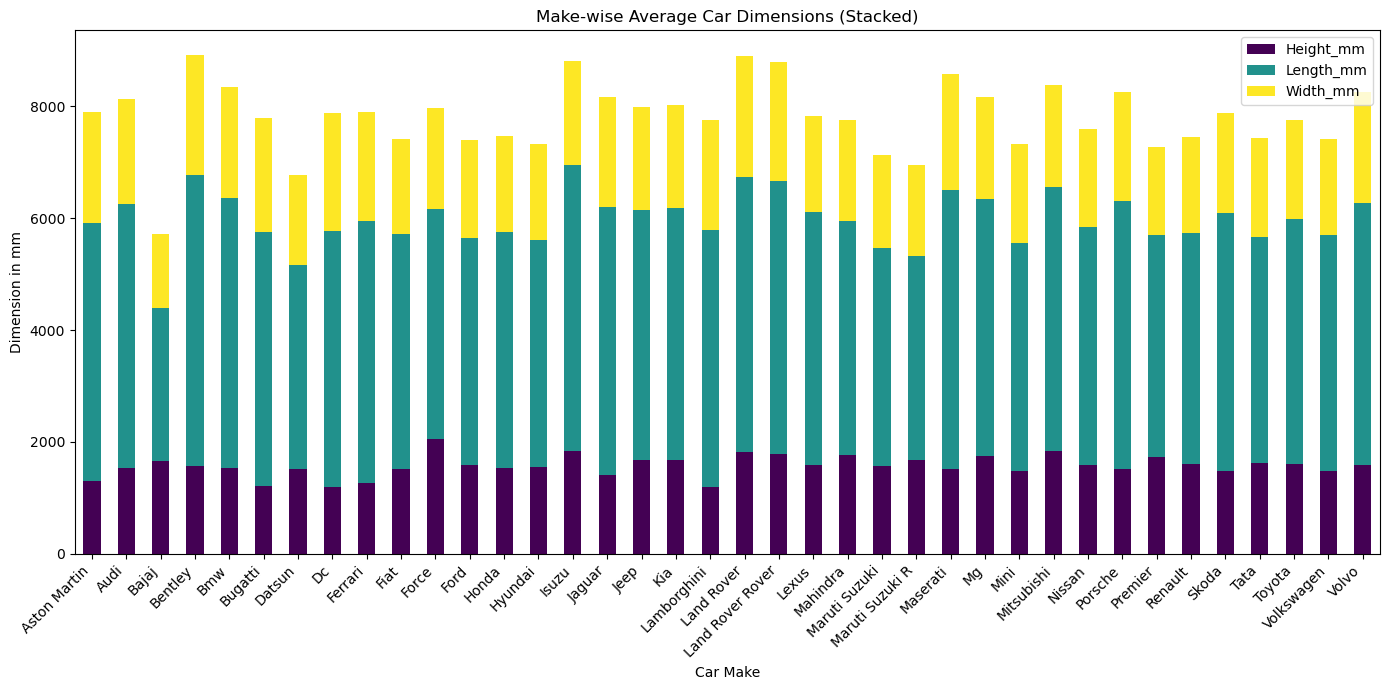

,Make,Height_mm,Length_mm,Width_mm
3,Bentley,1563.666667,5210.166667,2140.666667
19,Land Rover,1822.200000,4910.400000,2173.800000
14,Isuzu,1843.000000,5107.000000,1860.000000
20,Land Rover Rover,1782.370370,4875.407407,2137.037037
25,Maserati,1511.888889,4994.000000,2077.000000
28,Mitsubishi,1830.000000,4724.285714,1822.857143
4,Bmw,1541.486486,4816.891892,1980.243243
37,Volvo,1597.500000,4667.277778,1994.611111
30,Porsche,1509.000000,4793.500000,1950.000000
26,Mg,1742.153846,4602.538462,1831.000000


In [13]:
# Task 4

# Extract relevant dimensional columns
dimensions=df[['Make', 'Height_mm', 'Length_mm', 'Width_mm']].copy()

# Drop rows with missing dimension data
dimensions=dimensions.dropna(subset=['Height_mm', 'Length_mm', 'Width_mm'])

# Group by Make and calculate average dimensions
makewise_avg=dimensions.groupby('Make').mean(numeric_only=True).reset_index()

# Plot stacked bar chart
makewise_avg.set_index('Make')[['Height_mm', 'Length_mm', 'Width_mm']].plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='viridis'
)

plt.title('Make-wise Average Car Dimensions (Stacked)')
plt.ylabel('Dimension in mm')
plt.xlabel('Car Make')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Show the top 10 makes by average total dimension
makewise_avg['Total_Dimension_mm']=makewise_avg[['Height_mm', 'Length_mm', 'Width_mm']].sum(axis=1)
top10=makewise_avg.sort_values(by='Total_Dimension_mm', ascending=False).head(10)
top10[['Make', 'Height_mm', 'Length_mm', 'Width_mm']]

In [ ]:
# Interpretation:
# The stacked bar chart above displays the average height, length, and width for each car make.
# This helps identify which brands offer larger or more compact models, useful for both product planning and targeting consumer preferences.